In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
path1 = f"./data/round_2/prices_round_2_day_-1.csv"
path2 = f"./data/round_2/prices_round_2_day_0.csv"
path3 = f"./data/round_2/prices_round_2_day_1.csv"

In [4]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)

# Exploratory Data Analysis

In [5]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


<Axes: >

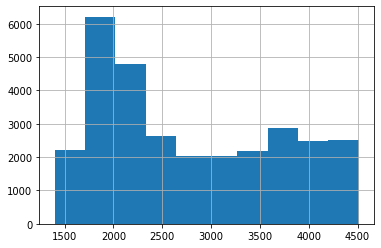

In [7]:
data["SUNLIGHT"].hist()

<Axes: >

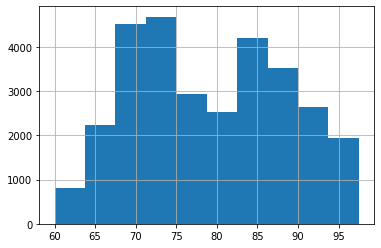

In [8]:
data["HUMIDITY"].hist()

<Axes: >

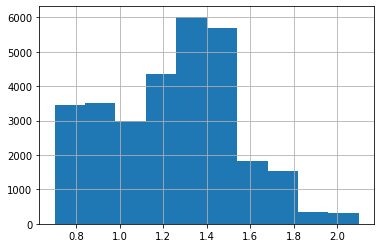

In [15]:
data["TRANSPORT_FEES"].hist()

<Axes: >

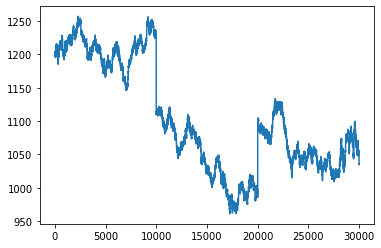

In [17]:
data["ORCHIDS"].plot() 

# Criteria:
### - Whenever **sunlight** exposure < 7 hours a day, production of orchids will decrease 4% every 10 minutes
### - Ideal **humidity** for orchids is between 60% and 80%. When outside this range, production falls 2% every 5% change in humidity
### - Orchids that cannot be **stored** correctly will deteriorate, and good **storage** comes for 0.1 seashells per orchid per timestamp